In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [149]:
# Checking the number of mice.
mice_count = len(complete_data["Mouse ID"].unique())
mice_count

249

In [150]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [151]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = duplicates[0]

duplicate_data = complete_data[complete_data['Mouse ID'] == duplicate_id]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [152]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_data[~complete_data['Mouse ID'].isin(duplicates)]
cleaned_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [153]:
cleaned_mice_count = len(cleaned_data["Mouse ID"].unique())
cleaned_mice_count

248

In [154]:
## Summary Statistics

In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stats_df = pd.concat([means, medians, variances, stds, sems], axis = 1)
column_names = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
stats_df.columns = column_names
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [156]:
## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

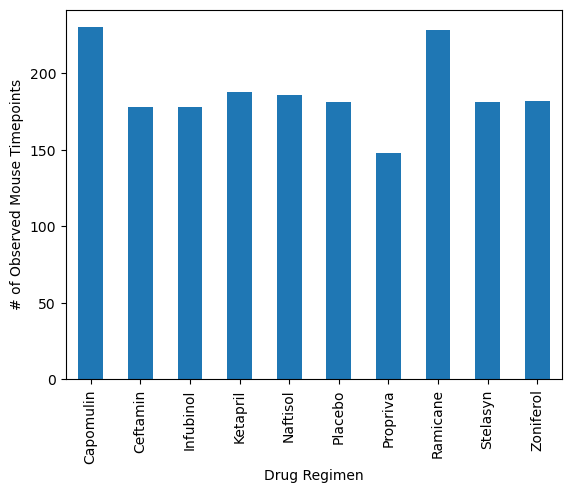

In [157]:
pandas_bar = cleaned_data.groupby("Drug Regimen").size()
pandas_bar.plot(kind = 'bar', ylabel = '# of Observed Mouse Timepoints')


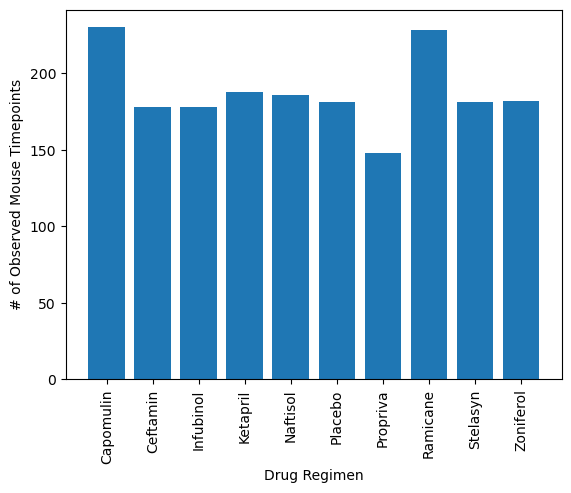

In [158]:
x_values = stats_df.index
y_values = cleaned_data.groupby("Drug Regimen").size()
plt.bar(x_values, y_values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Sex'}>

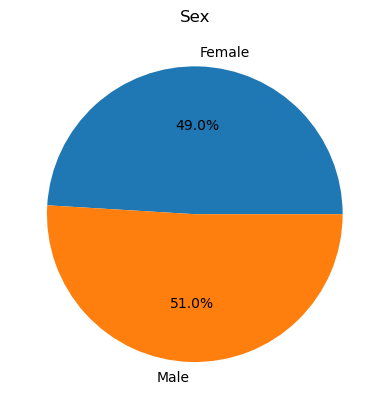

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = cleaned_data.groupby("Sex").size()
pandas_pie.plot(kind = 'pie', autopct='%1.1f%%', title='Sex')

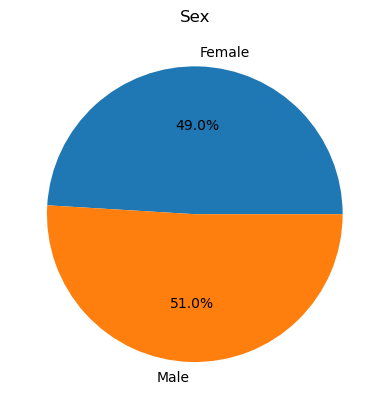

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_slices = cleaned_data.groupby("Sex").size()
pie_labels = ["Female","Male"]
plt.pie(pie_slices, labels = pie_labels, autopct='%1.1f%%')
plt.title("Sex")
plt.show()

In [161]:
## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cleaned_data.sort_values(by=["Mouse ID", "Timepoint"], ascending=[True, False])
sorted_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'}, inplace=True)

grouped_df = sorted_df.groupby(["Mouse ID"])

final_tumor_volumes = grouped_df.first()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volumes_df = pd.merge(cleaned_data, final_tumor_volumes["Final Tumor Volume (mm3)"], on = 'Mouse ID')

final_tumor_volumes

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
top_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data = []

for regimen in top_regimens:
    
    current_regimen = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == regimen]
    current_data = current_regimen["Final Tumor Volume (mm3)"]
    final_tumor_volume_data.append(current_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    q1 = current_data.quantile(0.25)
    q3 = current_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    outliers = []
    
    for data_point in current_data:
        
        if (data_point < lower_bound) | (data_point > upper_bound):
        
            outliers.append(data_point)
    
    print(f"The IQR for {regimen}: {iqr}")
    print(f"Potential outliers for {regimen}: {outliers}")

The IQR for Capomulin: 7.781863460000004
Potential outliers for Capomulin: []
The IQR for Ramicane: 9.098536719999998
Potential outliers for Ramicane: []
The IQR for Infubinol: 11.477135160000003
Potential outliers for Infubinol: [36.3213458]
The IQR for Ceftamin: 15.577752179999997
Potential outliers for Ceftamin: []


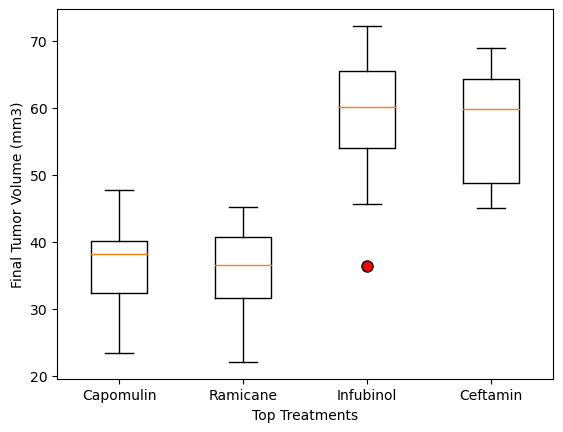

In [164]:
plt.boxplot(final_tumor_volume_data, labels = top_regimens, flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 8))
plt.xlabel("Top Treatments")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [165]:
## Line and Scatter Plots

In [166]:
capomulin_mouse = grouped_df.get_group("l509")
capomulin_mouse = capomulin_mouse.sort_values(by = ["Timepoint"], ascending = True)
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


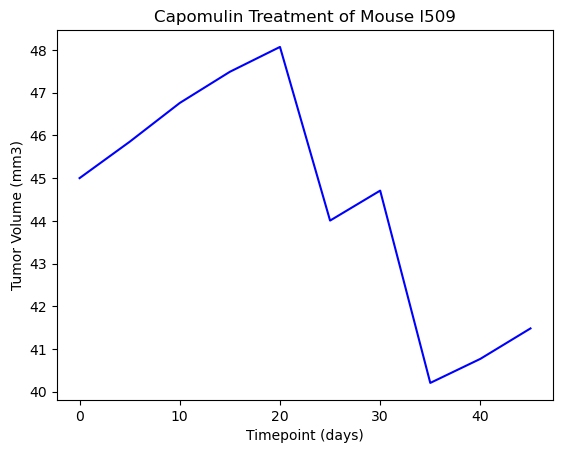

In [167]:
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Final Tumor Volume (mm3)"], color = 'b', linestyle = '-')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [168]:
capomulin_group = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'})
capomulin_group

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


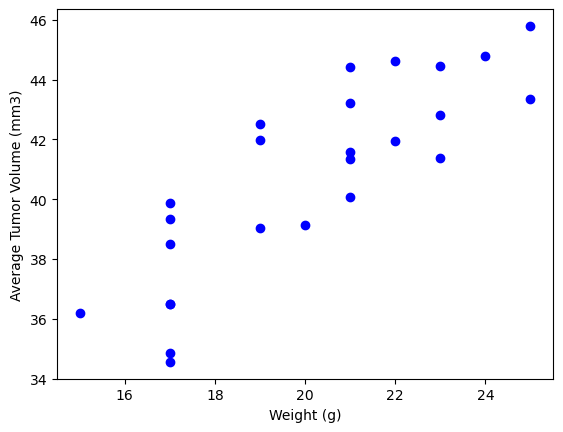

In [169]:
plt.scatter(capomulin_group["Weight (g)"], capomulin_group["Tumor Volume (mm3)"], color = 'b', marker = 'o')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

In [170]:
## Correlation and Regression

Correlation Coefficient: 0.841936342469472


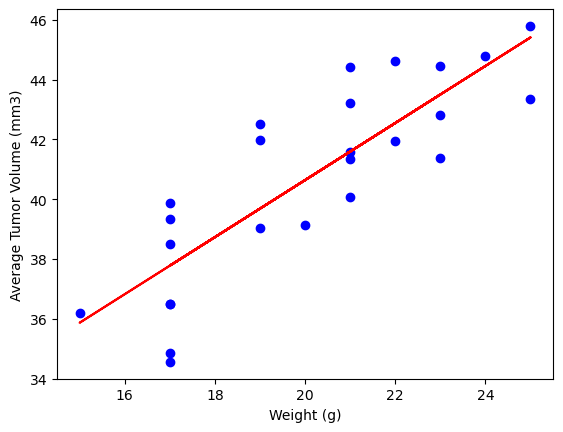

Line equation: y = 0.9544396890241049x + 21.552160532685008


In [171]:
correlation_coefficient, _ = st.pearsonr(capomulin_group['Weight (g)'], capomulin_group['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

m, b, r, p, err = st.linregress(capomulin_group['Weight (g)'], capomulin_group['Tumor Volume (mm3)'])

plt.scatter(capomulin_group["Weight (g)"], capomulin_group["Tumor Volume (mm3)"], color = 'b', marker = 'o')
plt.plot(capomulin_group['Weight (g)'], m * capomulin_group['Weight (g)'] + b, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

print(f"Line equation: y = {m}x + {b}")